## 🖇️David Labett - Kunskapskontroll

---

##### 📦Importera Bibliotek:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

##### 📂Läs in dataset: *`Students_Social_Media_Addiction.csv`*

In [ ]:
df = pd.read_csv("./Students_Social_Media_Addiction.csv")
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


#### 📑 Vidare skaffar vi oss en överblick: 


In [4]:
# Antal rader/kolumner
df.shape

(705, 13)

In [273]:
# Datatyper och null-värden
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [274]:
# Kompletterande .describe() för kategoriska kolumner
df.describe(include="object")

,Gender,Academic_Level,Country,Most_Used_Platform,Affects_Academic_Performance,Relationship_Status
count,705,705,705,705,705,705
unique,2,3,110,12,2,3
top,Female,Undergraduate,India,Instagram,Yes,Single
freq,353,353,53,249,453,384


In [275]:
# En kort kontroll för saknade värden:
if df.isnull().sum().any():
    print("Missing values found:")
    print(df.isnull().sum())
else:
    print("No missing values found.")

No missing values found.


In [276]:
# Antal unika värden i varje kolumn med datatyp 'object':
df.select_dtypes(include=['object']).nunique()

Gender                            2
Academic_Level                    3
Country                         110
Most_Used_Platform               12
Affects_Academic_Performance      2
Relationship_Status               3
dtype: int64

In [310]:
# Uppdelning av numeriska och kategoriska kolumner:
numeric_columns = df[['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']]
categorical_columns = df[['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Relationship_Status']]

print("Numerical columns:", numeric_columns.head(3))
print("Categorical columns:", categorical_columns.head(3))

Numerical columns:    Age  Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night  Mental_Health_Score  \
0   19                    5.2                    6.5                    6   
1   22                    2.1                    7.5                    8   
2   20                    6.0                    5.0                    5   

   Conflicts_Over_Social_Media  Addicted_Score  
0                            3               8  
1                            0               3  
2                            4               9  
Categorical columns:    Gender Academic_Level     Country Most_Used_Platform  \
0  Female  Undergraduate  Bangladesh          Instagram   
1    Male       Graduate       India            Twitter   
2  Female  Undergraduate         USA             TikTok   

  Affects_Academic_Performance Relationship_Status  
0                          Yes     In Relationship  
1                           No              Single  
2                          Yes         Complicated  


In [278]:
# Fördelning av länder och deras frekvenser
for country, count in df['Country'].value_counts().items():
  print(f"{country}: {count}")

India: 53
USA: 40
Canada: 34
France: 27
Mexico: 27
Spain: 27
Turkey: 27
Ireland: 27
Denmark: 27
Switzerland: 27
UK: 22
Japan: 21
Italy: 21
Russia: 21
Bangladesh: 20
Maldives: 19
Sri Lanka: 19
Nepal: 19
Pakistan: 19
China: 16
Poland: 16
Germany: 14
Australia: 14
South Korea: 13
UAE: 8
Singapore: 8
New Zealand: 8
Brazil: 8
Malaysia: 8
Netherlands: 8
Finland: 8
Austria: 1
Thailand: 1
Philippines: 1
Taiwan: 1
Indonesia: 1
Hong Kong: 1
Israel: 1
Egypt: 1
Morocco: 1
Vietnam: 1
Belgium: 1
Greece: 1
Portugal: 1
Sweden: 1
Norway: 1
Chile: 1
Argentina: 1
Ghana: 1
Kenya: 1
Nigeria: 1
South Africa: 1
Colombia: 1
Peru: 1
Costa Rica: 1
Bolivia: 1
Panama: 1
Jamaica: 1
Uruguay: 1
Paraguay: 1
Venezuela: 1
Ecuador: 1
Hungary: 1
Czech Republic: 1
Slovakia: 1
Croatia: 1
Serbia: 1
Slovenia: 1
Bulgaria: 1
Estonia: 1
Latvia: 1
Lithuania: 1
Ukraine: 1
Moldova: 1
Bahamas: 1
Trinidad: 1
Iceland: 1
Romania: 1
Kyrgyzstan: 1
Uzbekistan: 1
Kazakhstan: 1
Belarus: 1
Tajikistan: 1
Armenia: 1
Georgia: 1
Azerbaijan: 1
A

In [279]:
# Antal länder med endast 1 respondent
one_freq_countries = (df['Country'].value_counts() == 1).sum()
print(f"Number of countries with only 1 respondent: {one_freq_countries}")

Number of countries with only 1 respondent: 79


In [39]:
# Fördelning addicted_score .count()
df['Addicted_Score'].value_counts().sort_index()


Addicted_Score
2      1
3     16
4     83
5    136
6     61
7    209
8    144
9     55
Name: count, dtype: int64

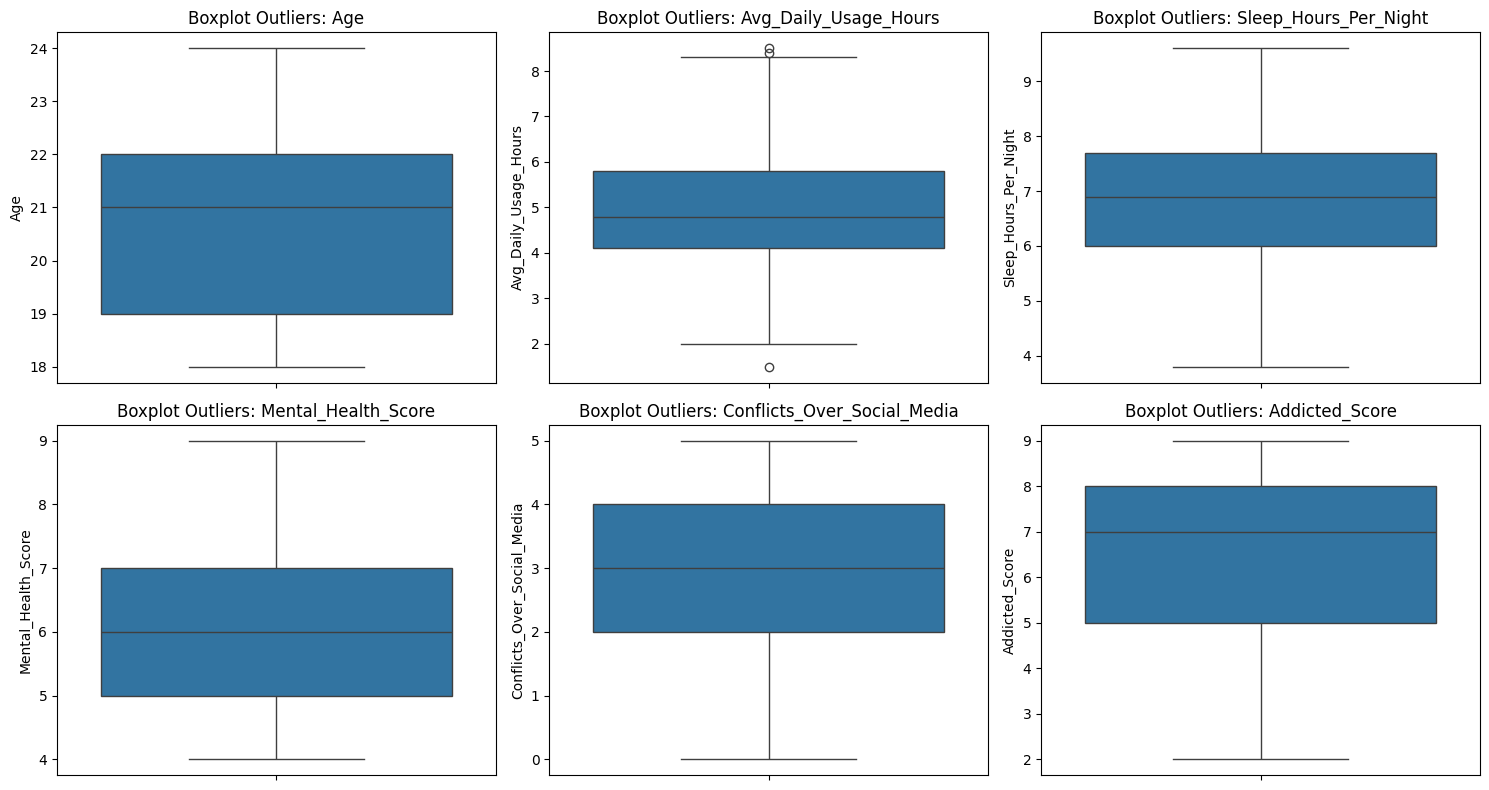

In [280]:
# Potentiella outliers i numeriska kolumner
plt.figure(figsize=(15, 8))

for i, column in enumerate(numeric_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(df, y=column)
    plt.title(f"Boxplot Outliers: {column}")
plt.tight_layout()
plt.show()

##### 📝 I vår generella överblick ser vi att datasetet ser ganska städat ut: 
- **`Addicted_Score`** är vår beroende variabel **`y`** - och vi vill undersöka hur de oberoende variablerna **`X`** korrelerar och påverkar *`y`*.

- Det finns *inga* null-värden.
- `Student_ID` är unik identifierare för varje respondent - och säkerställer att inga duplikat finns. Jag kommer välja att utföra `.drop()` på denna kolumn under min Exploratory Data Analysis eftersom den inte tillför något värde för analysen.
- De 6 kolumnerna med *`object`*-datatyp verkar, vid första anblick, ha en rimlig mängd olika värden för respektive kolumn.
- Dessa kolumner kommer vi behöva ta ställning till huruvida *`one-hot-encoding`* eller *`dummy-variable-encoding`* bör användas. Eftersom jag främst kommer att använda Linjära Regressionsmodeller är **`dummy-variable-encoding`** det nödvändiga valet. 
- Däremot behöver ett ställningstagande göras angående `Country`, där 110 olika kategoriska värden inte är rimligt för `dummy-variable-encoding`. För tillfället planerar jag att uföra en `.drop()` inför träning av Maskin-Inlärnings-modeller.
- Ingen av kolumnerna med kategorisk data innehar en tydlig rangordning - därav behövs inte någon *`ordinal-encoding`* utföras.

---

Genom att leta fram rekommenderat antal sömntimmar för olika åldersgrupper kan vi sätta kolumnen `Sleep_Hours_Per_Night` i perspektiv till vad som rekommenderas. Vi kan bygga vidare på detta genom att föra in dessa rekommendationer i en egna kolumner där varje rad/rekommendation kopplas till repsondentens ålder för jämförelser.

https://www.sleephealthjournal.org/article/s2352-7218(15)00015-7/fulltext

#### 💤 National Sleep Foundation Recommendations:

| Age Group                | Recommended (h) | May be appropriate (h) | Not recommended (h)        |
|--------------------------|-----------------|------------------------|----------------------------|
| ...                      |                 |                        |                            |
| **Teenagers (14-17 y)**  | 8 to 10         | 7, 11                  | Less than 7, More than 11  |
| **Young adults (18-25 y)**| 7 to 9         | 6, 10 to 11            | Less than 6, More than 11  |
| **Adults (26-64 y)**     | 7 to 9          | 6, 10                  | Less than 6, More than 10  |
| ...                      |                 |                        |                            |

#### TODO: Tar jag medianen eller minsta antal rekommenderade timmar för varje rekommendation, eller vad är klokast?
#### Eller kanske jag inte behöver kolumner, utan jag kan istället filtrera eller visualisera baserat på siffrorna?

"Sleep_Hours_Per_Night" baserat på:
- "Age" 14-17: "Recommender_Sleep" >= 8, "Not_Recommended_Sleep" <= 7
- "Age" 18-25: "Recommended_Sleep" >= 7, "Not_Recommended_Sleep" <= 5

---

#### 📢 Begränsningar:
- Alla mätningar i datan är självrapporterade och självskattade av varje enskild person. Brist på självinsikt och beroendebild kan bidra till icke sanningsenliga svar.

- Respondenterna skulle även kunna vara påverkade av social önskvärdhetsbias genom att de känner sig pressade att förneka beroendeproblematik, eller rationalisera den.



---

#### 📍Förståelse för varje kolumn och vad den representerar:

*``Student_ID:``* Unik för varje student - vilket säkerställer att inga duplikat finns.

*``Age:``* Ålder mellan 16-26 år.

*``Gender:``* Kategorisk kolumn med värdena *Male* eller *Female*.

*``Academic_Level:``* Kategorisk kolumn med personens högsta aktuella akademiska nivå (gäller även pågående).

*``Country:``* Landet personen bor i vid svarstillfället.

*``Avg_Daily_Usage_Hours:``* Det genomsnittliga antal timmar per dag personen spenderar på sociala medie-plattformar.

*``Most_Used_Platform:``* Kategorisk kolumn som innehåller värdet med den sociala medie-plattform personen mest frekvent använder.

*``Affects_Academic_Performance:``* Kategorisk kolumn med värdena *Yes* och *No* baserat på frågan *..whether the student perceives their social media use as having a negative impact on their academic performance*.

Self-reported impace on academics. Answers question .

*``Sleep_Hours_Per_Night:``* Det genomsnittliga antalet timmar som personen sover per natt.

*``Mental_Health_Score:``* Skala mellan 1 (Dålig) till 10 (Mycket bra) där personen självskattar sin generella psykiska hälsa.

Self-rated mental health score of the respondent.

*``Relationship_Status:``* Kategorisk kolumn som innehåller *Single*, *In Relationship* och *Complicated*

*``Conflicts_Over_Social_Media:``* Antal konflikter/meningsskiljaktigheter med familj, vänner eller partner över personens sociala medie-vanor.

*``Addicted_Score:``* Standardiserad skala ``(1 = Låg till 10 = Hög)`` baserat på *Bergen Social Media Addiction Scale*.


---

### ✂️ Bearbetning av datan

In [311]:
df = df.drop(columns=['Student_ID'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           705 non-null    int64  
 1   Gender                        705 non-null    object 
 2   Academic_Level                705 non-null    object 
 3   Country                       705 non-null    object 
 4   Avg_Daily_Usage_Hours         705 non-null    float64
 5   Most_Used_Platform            705 non-null    object 
 6   Affects_Academic_Performance  705 non-null    object 
 7   Sleep_Hours_Per_Night         705 non-null    float64
 8   Mental_Health_Score           705 non-null    int64  
 9   Relationship_Status           705 non-null    object 
 10  Conflicts_Over_Social_Media   705 non-null    int64  
 11  Addicted_Score                705 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 66.2+ KB


---

### 📊 EDA - Data & Distribution

Gender
Female    353
Male      352
Name: count, dtype: int64


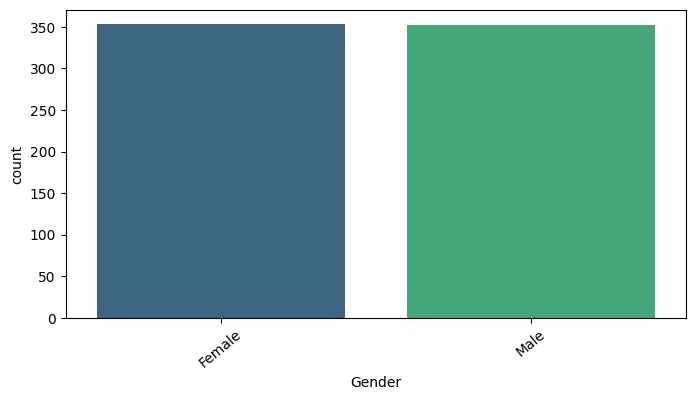

Academic_Level
Undergraduate    353
Graduate         325
High School       27
Name: count, dtype: int64


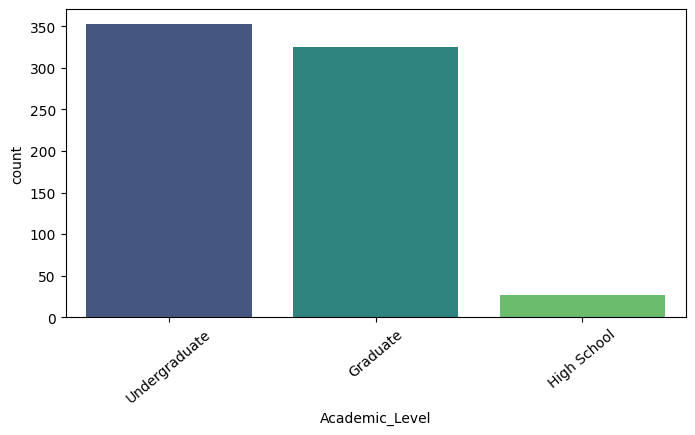

Country
India          53
USA            40
Canada         34
France         27
Mexico         27
               ..
Oman            1
Afghanistan     1
Syria           1
Yemen           1
Bhutan          1
Name: count, Length: 110, dtype: int64


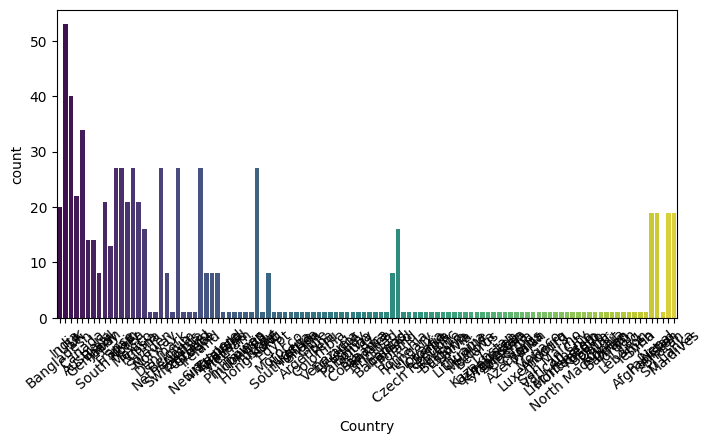

Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
VKontakte     12
LINE          12
KakaoTalk     12
YouTube       10
Name: count, dtype: int64


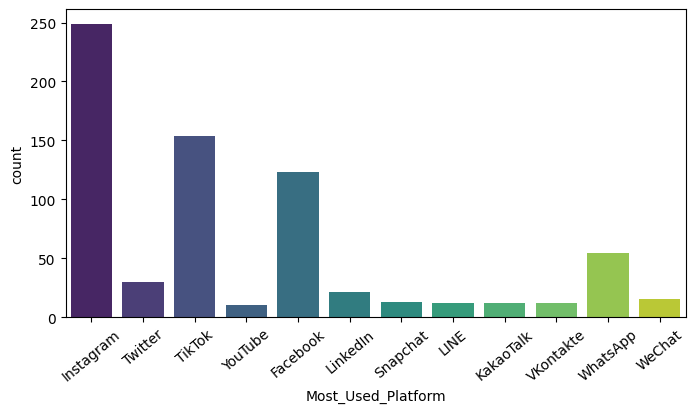

Affects_Academic_Performance
Yes    453
No     252
Name: count, dtype: int64


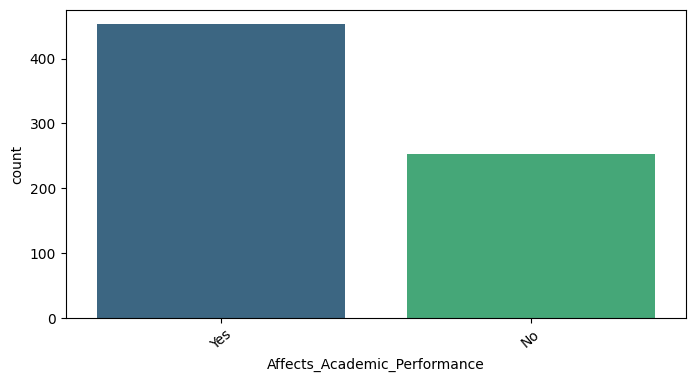

Relationship_Status
Single             384
In Relationship    289
Complicated         32
Name: count, dtype: int64


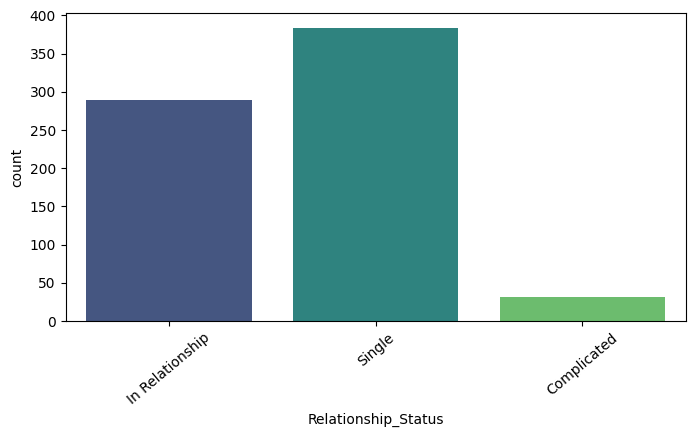

In [54]:
for column in df.columns:
  if df[column].dtype == 'object':
    print(df[column].value_counts())

    plt.figure(figsize=(8, 4))
    sns.countplot(df, x=column, palette="viridis", hue=column)
    plt.xticks(rotation=40)
    
    plt.show()

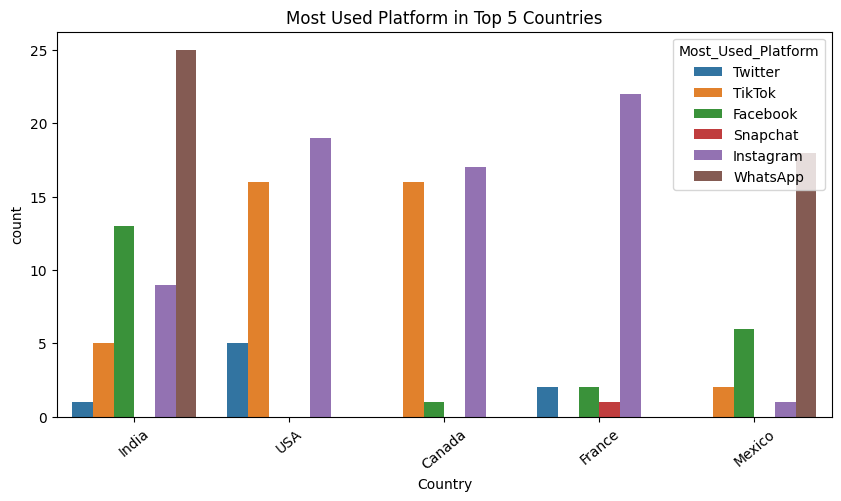

In [ ]:
top_countries = df['Country'].value_counts().nlargest(5).index

plt.figure(figsize=(10, 5))
sns.countplot(
  df[df['Country'].isin(top_countries)],
  x='Country',
  hue='Most_Used_Platform')
plt.title("Most Used Platform in Top 5 Countries")
plt.xticks(rotation=40)

plt.show()

Most_Used_Platform
WhatsApp     7.462963
Snapchat     7.461538
TikTok       7.428571
Instagram    6.554217
YouTube      6.100000
WeChat       6.066667
KakaoTalk    6.000000
Facebook     5.666667
Twitter      5.500000
VKontakte    5.000000
LinkedIn     3.809524
LINE         3.000000
Name: Addicted_Score, dtype: float64


C:\Users\david\AppData\Local\Temp\ipykernel_23976\1558275003.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_addicted.index, y=platform_addicted.values, palette="viridis")


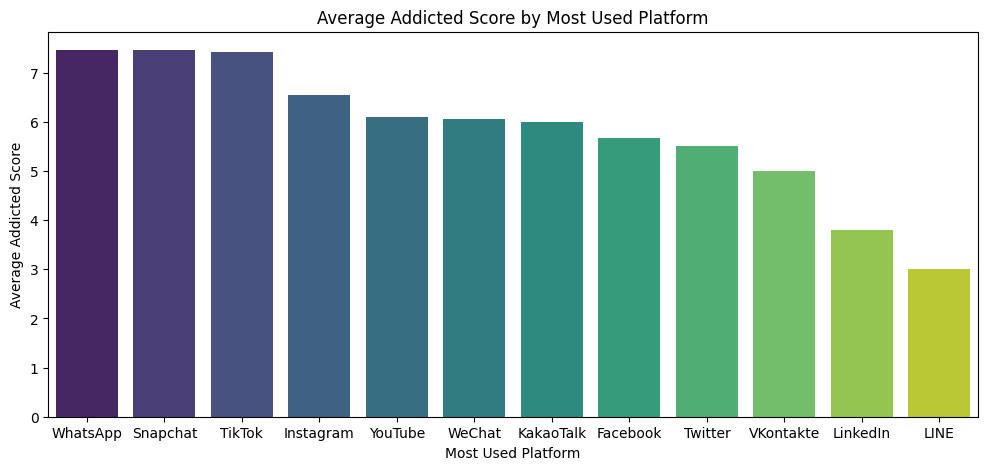

In [66]:
# Vilken plattform har högst genomsnittligt addicted_score?
platform_addicted = df.groupby('Most_Used_Platform')['Addicted_Score'].mean().sort_values(ascending=False)
print(platform_addicted)

# Visualisering 
plt.figure(figsize=(12, 5))

sns.barplot(x=platform_addicted.index, y=platform_addicted.values, palette="viridis")
plt.xlabel("Most Used Platform")
plt.ylabel("Average Addicted Score")
plt.title("Average Addicted Score by Most Used Platform")

plt.show()

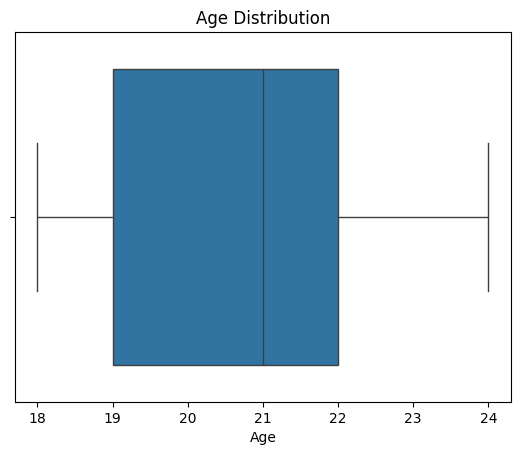

In [21]:
#Åldersdistribution:
sns.boxplot(
  df, 
  x="Age")
plt.title('Age Distribution')

plt.show()

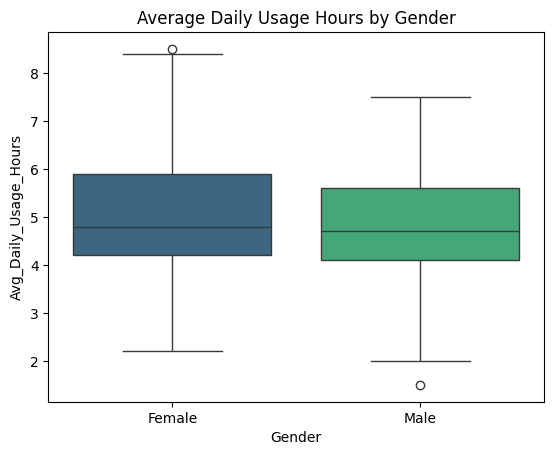

In [235]:
# Genomsnittlig daglig användning av Sociala Medier mellan kön:
sns.boxplot(
  df, 
  x="Gender", 
  y="Avg_Daily_Usage_Hours", 
  palette="viridis", 
  hue="Gender")
plt.title('Average Daily Usage Hours by Gender')

plt.show()

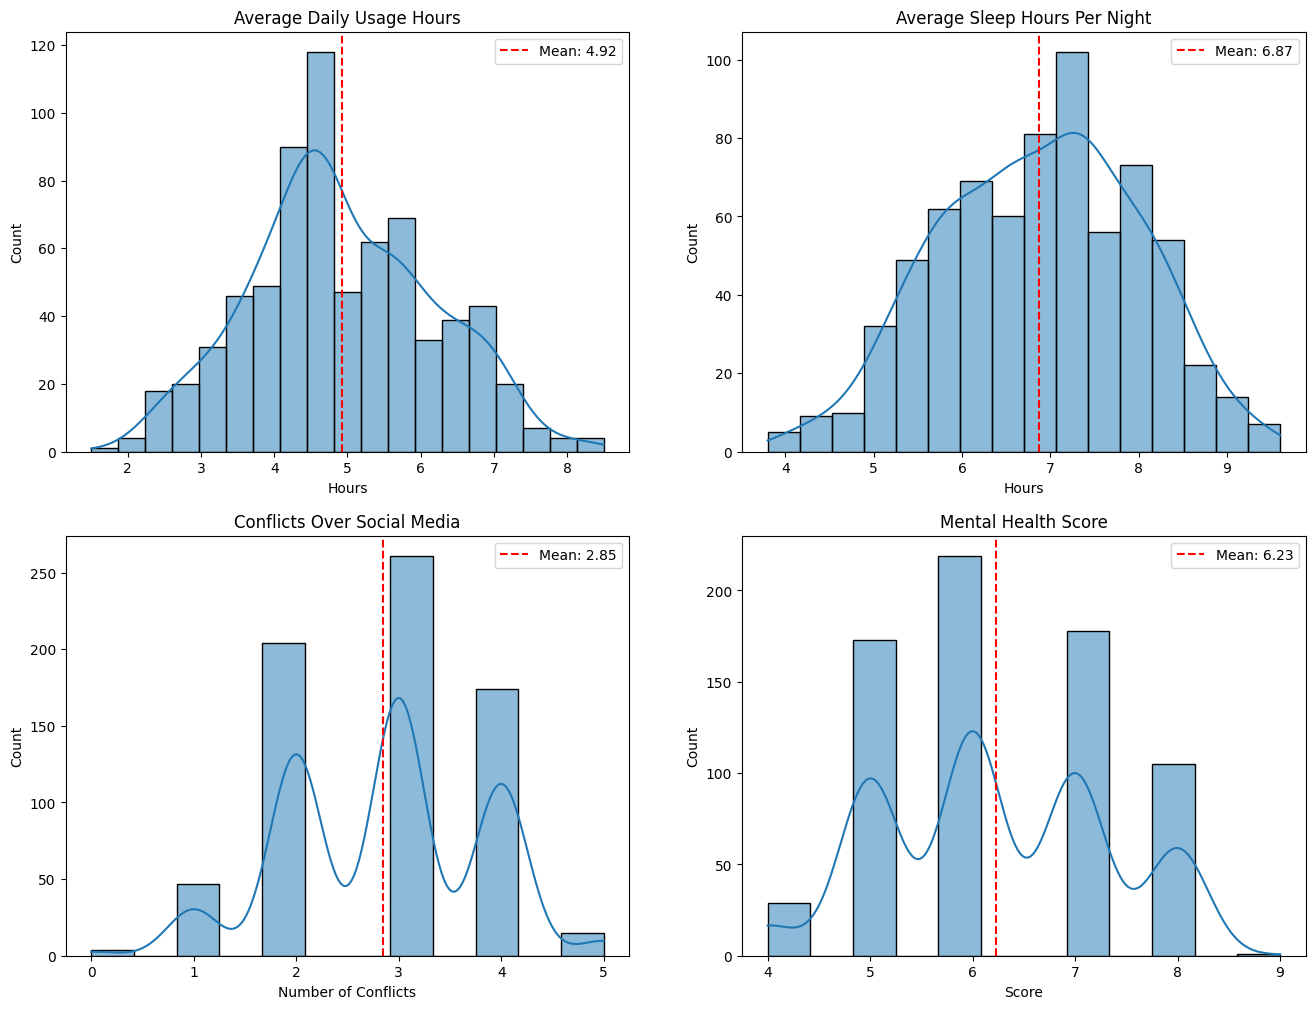

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1
sns.histplot(df['Avg_Daily_Usage_Hours'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Average Daily Usage Hours')
axes[0, 0].set_xlabel('Hours')
axes[0, 0].axvline(df['Avg_Daily_Usage_Hours'].mean(), color='red', linestyle='dashed', label=f"Mean: {df['Avg_Daily_Usage_Hours'].mean():.2f}")
axes[0, 0].legend()

# Plot 2
sns.histplot(df['Sleep_Hours_Per_Night'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Average Sleep Hours Per Night')
axes[0, 1].set_xlabel('Hours')
axes[0, 1].axvline(df['Sleep_Hours_Per_Night'].mean(), color='red', linestyle='dashed', label=f"Mean: {df['Sleep_Hours_Per_Night'].mean():.2f}")
axes[0, 1].legend()

# Plot 3
sns.histplot(df['Conflicts_Over_Social_Media'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Conflicts Over Social Media')
axes[1, 0].set_xlabel('Number of Conflicts')
axes[1, 0].axvline(df['Conflicts_Over_Social_Media'].mean(), color='red', linestyle='dashed', label=f"Mean: {df['Conflicts_Over_Social_Media'].mean():.2f}")
axes[1, 0].legend()

# Plot 4
sns.histplot(df['Mental_Health_Score'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Mental Health Score')
axes[1, 1].set_xlabel('Score')
axes[1, 1].axvline(df['Mental_Health_Score'].mean(), color='red', linestyle='dashed', label=f"Mean: {df['Mental_Health_Score'].mean():.2f}")
axes[1, 1].legend()

plt.show()

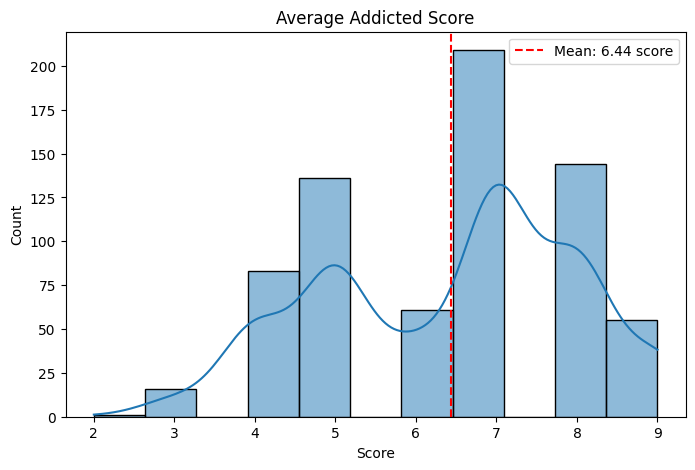

In [237]:
plt.figure(figsize=(8, 5))

sns.histplot(df['Addicted_Score'], kde=True)
plt.xlabel('Score')
plt.title('Average Addicted Score')
plt.axvline(df['Addicted_Score'].mean(), color='red', linestyle='dashed', label=f"Mean: {df['Addicted_Score'].mean():.2f} score")
plt.legend()

plt.show()

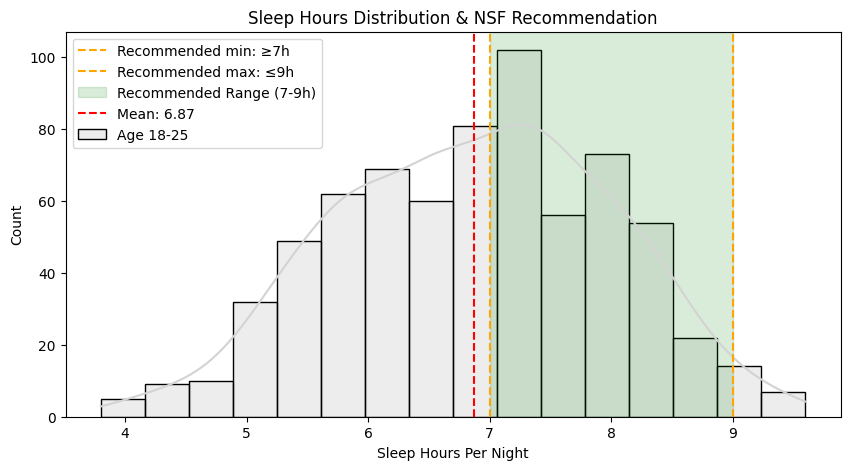

In [27]:
# Visualisering av rekommendation för Sleep_Hours_Per_Night (Baserad på National Sleep Foundation)
plt.figure(figsize=(10, 5))

sns.histplot(
    df[(df['Age'] >= 18) & (df['Age'] <= 25)]['Sleep_Hours_Per_Night'],
    color='lightgrey', label='Age 18-25', kde=True, alpha=0.4
)
plt.axvline(7, color='orange', linestyle='dashed', label='Recommended min: ≥7h')
plt.axvline(9, color='orange', linestyle='dashed', label='Recommended max: ≤9h')

plt.axvspan(7, 9, color='green', alpha=0.15, label='Recommended Range (7-9h)')

plt.axvline(df['Sleep_Hours_Per_Night'].mean(), color='red', linestyle='dashed', label=f"Mean: {df['Sleep_Hours_Per_Night'].mean():.2f}")

plt.xlabel('Sleep Hours Per Night')
plt.title('Sleep Hours Distribution & NSF Recommendation')
plt.legend()

plt.show()

#### 🔎 Observationer utifrån visualisering & distribution:

- 🙋‍♀️🙋‍♂️ Könsfördelningen är nästan helt jämn i datasetet.

- 👩‍🎓👨‍🎓 De flesta respondenterna är *Undergraduate* eller *Graduate* - medan *High School* är underrepresenterad. Detta speglar också åldersfördelningen i datasetet.
- 📱 Instagram är den överlägset mest populära plattformen hos respondenterna. Följt av TikTok, Facebook, WhatsApp och Twitter osv.
- 📈 En stor andel av studenterna anser att deras Sociala Medie-vanor påverkar deras akademiska resultat.
- 👬👭👫 Relationsstatusen som var mest frekvent hos respondenterna var *Single*.
- 📆 Vi ser ``ett åldersspann mellan 18 och 24 år``.
- Medianåldern ligger på **``21 år``**.
- 🙋‍♀️ Fördelningen av daglig användning mellan könen är tämligen likvärdig, men visar sig vara lite större hos kvinnor.






#### 🔎 Inferenser utifrån visualisering & distribution:

- 🙋‍♀️🙋‍♂️ En jämn könsfördelning minskar risken för bias kön i analysen.

- 👩‍🎓👨‍🎓 
- 👬👭👫Den höga andelen singlar kan spegla åldersgruppen - men skulle även kunna relateras till sociala mediers roll i relationer och socialt liv.
  - Det är svårt att undersöka detta vidare med den befintliga datan, därför stannar det vid hypotes-stadiet.
- 🗺️ *Indien*, *USA*, *Canada* är i toppen av länderna som representeras. Resursrika länder som dessa, där teknik är lättilgänglig för gemene man, skapar förutsättningar för att man också utsätts för mer/tyngre bruk av sociala medier - och i sin tur dess eventuella konsekvenser.
- 🧮 *Medianen* för `Avg_Daily_Usage_Hours` är **4.92 Timmar/Dag** vilket indikerar att sociala medier utgör en stor del av studenters dagliga vanor. 
  - Vidare kan detta möjligen korrelera med den stora andelen som känner påverkan på sina akademiska resultat då nästan 5h/dag av potentiell studietid går förlorad.
  - Datasetet belyser en generation och population med hög risk att utveckla problematiska- vanor och/eller beroende av sociala medier. 
- 🛌 Samtidigt är *medianen* för `Sleep_Hours_Per_Night` **6.87** vilket visar på ett relativt högt antal sömntimmar.
- 💢 *Medianen* för `Conflicts_Over_Social_Media` är *2.85**. Detta tyder på att social friktion är ganska vanligt förekommande för studenterna.
- ⚠️ `Addicted_Score` är, *likt resterande kolumner med skalor*, mellan *1 - 10*. En *medianen* på **6.44** kan tyda på en konsekvens av ovanstående observationer.
  - Trots att studien är självskattad, är det lite förvånande för mig hur respondenterna har självinsikt nog i sitt eventuella beroende att skatta sig generellt högt i skalan.
  - En hög median stärker bilden av att sociala medier är en central, och ibland problematisk del av yngre personers liv.
- 📱 *Instagram* och *TikToks* överlägsna popularitet skulle kunna bero på deras *Reel*-format som är konstruerat för *instant gratification* och dopamin-påslag som fångar användaren i ett oändligt scrollande.

- 🧮 Vidare bör korrelationer utforskas:
  - 📈 Hög `Avg_Daily_Usage_Hours` korrelerar förmodligen med hög `Addicted_Score`.
  - 📉 Låg `Sleep_Hours_Per_Night` samt `Mental_Health_Score` kan också tänkas korrelera med en hög `Addicted_Score`.
  - ❔ Kan en begränsad mängd konsumption/användning av Social Media bidra till en mer positiv `Mental_Health_Score`?
  - 🛌 Medianen för antal sömntimmar visade sig vara relativt hög, kanske sociala medie-vanor tar mer respondenternas dag-/studietid snarare än potentiell sömn?
  - 💢 Medianen för `Conflicts_Over_Social_Media` väcker frågan om denna friktion vidare påverkar relationer och `Mental_Health_Score`.

---

### 📑 Korrelationer


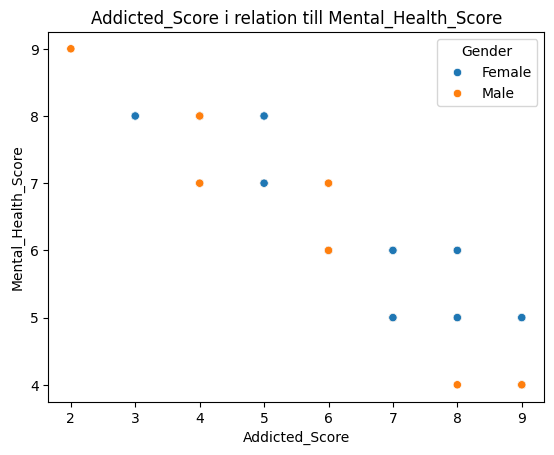

In [ ]:
# Korrelation mellan Addicted_Score och Mental_Health_Score
sns.scatterplot(
  df,
  x="Addicted_Score",
  y="Mental_Health_Score",
  hue="Gender"
)

plt.title("Addicted_Score i relation till Mental_Health_Score")
plt.xlabel("Addicted_Score")
plt.ylabel("Mental_Health_Score")

plt.show()

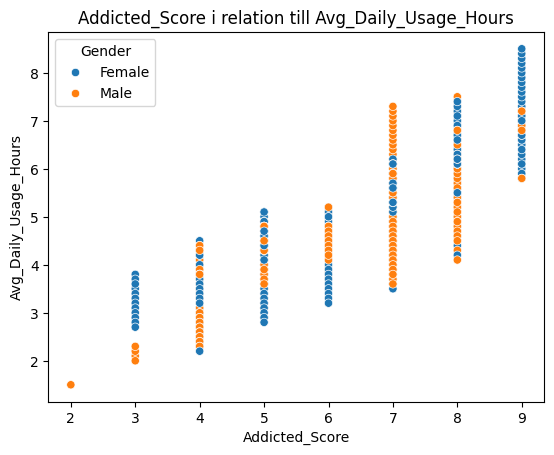

In [240]:
#Korrelation mellan Addicted_Score och Avg_Daily_Usage_Hours
sns.scatterplot(
  data=df,
  x="Addicted_Score",
  y="Avg_Daily_Usage_Hours",
  hue="Gender"
)

plt.title("Addicted_Score i relation till Avg_Daily_Usage_Hours")
plt.xlabel("Addicted_Score")
plt.ylabel("Avg_Daily_Usage_Hours")

plt.show()

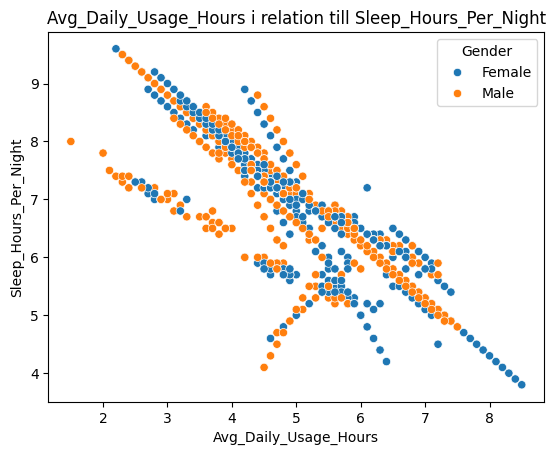

In [241]:
 #Korrelation mellan Avg_Daily_Usage_Hours och Sleep_Hours_Per_Night
sns.scatterplot(
  data=df,
  x="Avg_Daily_Usage_Hours",
  y="Sleep_Hours_Per_Night",
  hue="Gender"
)
plt.title("Avg_Daily_Usage_Hours i relation till Sleep_Hours_Per_Night")
plt.xlabel("Avg_Daily_Usage_Hours")
plt.ylabel("Sleep_Hours_Per_Night")

plt.show()

✏️ När vi börjar titta på hur vår beroende variabel *`Addicted_Score`* korrelerar med oberoende variabler som *`Mental_Health_Score`*,  *`Avg_Daily_Usage_Hours`* samt *`Sleep_Hours_Per_Night`* ser vi att:



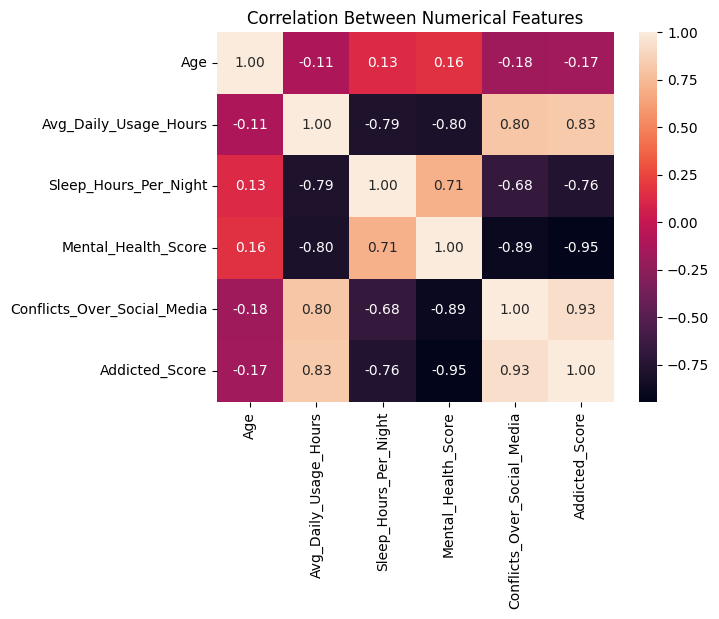

In [ ]:
# Korrelation mellan numeriska kolumner:
correlation = numeric_columns.corr()

sns.heatmap(correlation, annot=True, fmt=".2f")
plt.title("Correlation Between Numerical Features")

plt.show()

### Idéer Streamlit

- Svara på frågor/skriv in information
- Visualisera var du ligger i jämförelse med datan vi har (Illustrera med en -- linje )
- If-sats som tar in predikterad addicted_score och "klassificerar" användaren i "Låg Addiction", "Medel Addiction", "Hög Addiction"
- Viktigt! "Normalisera" Bergen Social Media Addiction Scale / 3

---

When binning Addicted_Score (1–10) into Low, Medium, and High, consider the following:

Distribution: Check how the scores are distributed. Aim for bins that create groups of reasonable and interpretable size—avoid bins where almost everyone ends up in one group.
Domain knowledge: If there are established cutoffs in the literature (e.g., clinical thresholds for addiction), use those.
Interpretability: Choose bin edges that are easy to explain (e.g., 1–4 = Low, 5–7 = Medium, 8–10 = High), unless the data distribution suggests otherwise.
Class balance: Try to avoid highly imbalanced classes, especially if you plan to use the bins for classification models.
Purpose: If the goal is risk identification, you might want stricter thresholds for “High.” If the goal is general description, more even bins may be better.
Edge cases: Decide how to handle scores that fall exactly on the bin edges (e.g., should 4 be Low or Medium?).
In summary: Use a combination of data distribution, domain knowledge, and practical considerations to set your bin edges. Visualize the distribution and test different splits if unsure.

### ✂️ Bearbetning av datan

In [187]:
df = pd.read_csv("./Dataset/Students_Social_Media_Addiction.csv")
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [188]:
# .drop() av onödiga kolumner (Student_ID, Country, Most_Used_Platform, Academic_Level) inför träning av modell
df_clean = df.drop(columns=['Student_ID', 'Country', 'Most_Used_Platform', 'Academic_Level'], axis=1)

# Preprocessering Linear Regression
df_lr = df_clean.copy()

# Dummy encoding av kategoriska kolumner för Linjär Regressionsmodell
df_lr = pd.get_dummies(df_lr, dtype=int, drop_first=True)

#------------------------------------------------------------------------------------------------------#

# Preprocessering Random Forest Classifier
df_rf = df.copy()

# .drop() av onödiga kolumner (Student_ID, Country, Most_Used_Platform, Academic_Level) inför träning av modell
df_rf = df_rf.drop(columns=['Student_ID', 'Country', 'Most_Used_Platform', 'Academic_Level'], axis=1)

# Binning för kategorisering av Addicted_Score
bins = [1, 4.5, 7.5, 10]
labels = ['Low', 'Medium', 'High']
df_rf['Addicted_Grade'] = pd.cut(
  df_rf['Addicted_Score'], 
  bins=bins, 
  labels=labels, 
  include_lowest=True)

# Ordinal-encoding av Addicted_Score (y) för Klassificeringsmodell
mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df_rf['Addicted_Grade'] = df_rf['Addicted_Grade'].map(mapping)

# One-hot-encoding av kategoriska kolumner, exklusive y, för Klassificeringsmodell
df_rf_xfeatures = df_rf.drop(columns=['Addicted_Score', 'Addicted_Grade'])
df_rf_xfeatures = pd.get_dummies(df_rf_xfeatures, dtype=int)

In [189]:
# Granskning av bearbetad dataframe för Random Forest Classifier
df_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Age                           705 non-null    int64   
 1   Gender                        705 non-null    object  
 2   Avg_Daily_Usage_Hours         705 non-null    float64 
 3   Affects_Academic_Performance  705 non-null    object  
 4   Sleep_Hours_Per_Night         705 non-null    float64 
 5   Mental_Health_Score           705 non-null    int64   
 6   Relationship_Status           705 non-null    object  
 7   Conflicts_Over_Social_Media   705 non-null    int64   
 8   Addicted_Score                705 non-null    int64   
 9   Addicted_Grade                705 non-null    category
dtypes: category(1), float64(2), int64(4), object(3)
memory usage: 50.5+ KB


In [190]:
# Granskning av bearbetad dataframe för Random Forest Classifier
df_rf_xfeatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  705 non-null    int64  
 1   Avg_Daily_Usage_Hours                705 non-null    float64
 2   Sleep_Hours_Per_Night                705 non-null    float64
 3   Mental_Health_Score                  705 non-null    int64  
 4   Conflicts_Over_Social_Media          705 non-null    int64  
 5   Gender_Female                        705 non-null    int64  
 6   Gender_Male                          705 non-null    int64  
 7   Affects_Academic_Performance_No      705 non-null    int64  
 8   Affects_Academic_Performance_Yes     705 non-null    int64  
 9   Relationship_Status_Complicated      705 non-null    int64  
 10  Relationship_Status_In Relationship  705 non-null    int64  
 11  Relationship_Status_Single      

In [191]:
# Granskning av bearbetad dataframe för Linear Regression
df_lr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  705 non-null    int64  
 1   Avg_Daily_Usage_Hours                705 non-null    float64
 2   Sleep_Hours_Per_Night                705 non-null    float64
 3   Mental_Health_Score                  705 non-null    int64  
 4   Conflicts_Over_Social_Media          705 non-null    int64  
 5   Addicted_Score                       705 non-null    int64  
 6   Gender_Male                          705 non-null    int64  
 7   Affects_Academic_Performance_Yes     705 non-null    int64  
 8   Relationship_Status_In Relationship  705 non-null    int64  
 9   Relationship_Status_Single           705 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 55.2 KB


---

#### Klassificeringsmodell: Binning + ordinal encoding

---

### 🧮 Maskininlärning:

In [ ]:
# 📈 Linjär Regressionsmodell: Train, Test, Split
X_reg = df_lr.drop(columns=['Addicted_Score'], axis=1)
y_reg = df_lr['Addicted_Score']

X_train_reg_full, X_test_reg, y_train_reg_full, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(X_train_reg_full, y_train_reg_full, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

# Initiera/Träna modell
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)

# 📐 Validera/Utvärdera på valideringsset
lin_reg_val_pred = lin_reg.predict(X_val_reg)

# Utvärdera med RMSE (Hur mycket avviker våra prediktioner från verkliga värden)
lin_reg_rmse = root_mean_squared_error(y_val_reg, lin_reg_val_pred)
print(f"Linear Regression Validation RMSE: {lin_reg_rmse:.2f}")

# Jämför medelvärdet på y_val_reg med RMSE (Hur stor andel av medelvärdet utgör RMSE)
print(f"Mean of y_val_reg: {y_val_reg.mean():.2f}") # medelvärdet på de verkliga värdena (i valideringssetet)
print(f"RMSE / y_val_reg mean: {root_mean_squared_error(y_val_reg, lin_reg_val_pred) / y_val_reg.mean():.2f}")

Linear Regression Validation RMSE: 0.37
Mean of y_val_reg: 6.48
RMSE / y_val_reg mean: 0.06


**Linear Regression Validation RMSE: 0.37**
→ Modellens genomsnittliga fel (i samma skala som Addicted_Score) är 0.37 poäng.

**Mean of y_val_reg: 6.48**
→ Medelvärdet på de faktiska Addicted_Score-värdena i valideringsdatan är 6.48.

**RMSE / y_val_reg mean: 0.06**
→ Modellens genomsnittliga fel är bara 6% av medelvärdet på y. Det är ett mycket litet relativt fel, vilket tyder på att modellen gör bra ifrån sig på valideringsdatan.

#### Linear Regression utvärderad på Testdatan

In [ ]:
# Linear Regression: Testset
lin_reg_test_pred = lin_reg.predict(X_test_reg)

# Utvärdera med RMSE
lin_reg_test_rmse = root_mean_squared_error(y_test_reg, lin_reg_test_pred)
print(f"Linear Regression Test RMSE: {lin_reg_test_rmse:.2f}")

# Jämför medelvärdet på y_test_reg med RMSE (Hur stor andel av medelvärdet utgör RMSE)
print(f"Mean of y_test_reg: {y_test_reg.mean():.2f}")
print(f"RMSE / y_test_reg mean: {lin_reg_test_rmse / y_test_reg.mean():.2f}")

Linear Regression Test RMSE: 0.33
Mean of y_test_reg: 6.37
RMSE / y_test_reg mean: 0.05


---

Random Forest Validation Accuracy: 0.98

Classification Report (Validation set):
               precision    recall  f1-score   support

         Low       1.00      0.90      0.95        20
      Medium       0.96      1.00      0.98        79
        High       1.00      0.98      0.99        42

    accuracy                           0.98       141
   macro avg       0.99      0.96      0.97       141
weighted avg       0.98      0.98      0.98       141

Confusion Matrix (Validation set):<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000002E0073AB9B0>


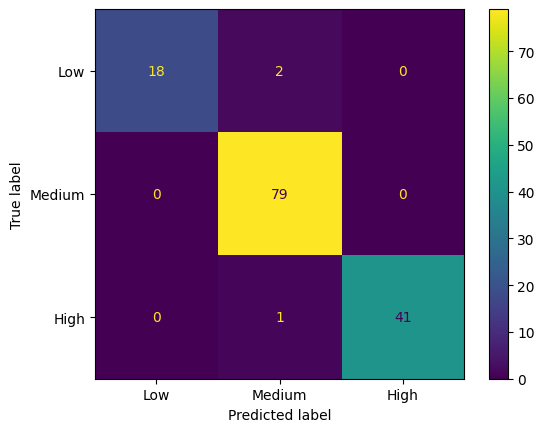

In [202]:
# 🧮 Random Forest Klassiciceringsmodell: Train, Test, Split
X_rf = df_rf_xfeatures
y_rf = df_rf['Addicted_Grade']

X_train_rf_full, X_test_rf, y_train_rf_full, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)
X_train_rf, X_val_rf, y_train_rf, y_val_rf = train_test_split(X_train_rf_full, y_train_rf_full, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Initiera/Träna modell
rf_class = RandomForestClassifier(random_state=42)
rf_class.fit(X_train_rf, y_train_rf)

# 📐 Validera/Utvärdera på valideringsset
rf_class_val_pred = rf_class.predict(X_val_rf)

# Utvärderingsmått
labels = [1, 2, 3]
targets = ['Low', 'Medium', 'High']

acc_rf = accuracy_score(y_val_rf, rf_class_val_pred)
print(f"Random Forest Validation Accuracy: {acc_rf:.2f}")
print("\nClassification Report (Validation set):\n", classification_report(
  y_val_rf, 
  rf_class_val_pred, 
  labels=labels,
  target_names=targets
))

# Confusuion Matrix
cm = ConfusionMatrixDisplay.from_predictions(
  y_val_rf, 
  rf_class_val_pred, 
  labels=labels,
  display_labels=targets)

print(f'Confusion Matrix (Validation set):{cm}')

**Accuracy: 0.98**
→ 98% av alla förutsägelser på valideringsdatan är korrekta.

**Precision, recall och f1-score** är höga för alla klasser:

**"Low"**: f1-score 0.95 (några få missar, men mycket bra)

**"Medium"**: f1-score 0.98 (nästan perfekt)

**"High"**: f1-score 0.99 (nästan perfekt)

**Macro avg och weighted avg** är också mycket höga, vilket visar att modellen är balanserad och fungerar bra för alla klasser.

#### Random Forest Classification utvärderad på Testdatan

Random Forest Test Accuracy: 0.99

Classification Report (Test set):
               precision    recall  f1-score   support

         Low       1.00      0.94      0.97        18
      Medium       0.99      1.00      0.99        85
        High       1.00      1.00      1.00        38

    accuracy                           0.99       141
   macro avg       1.00      0.98      0.99       141
weighted avg       0.99      0.99      0.99       141

Confusion Matrix (Testset):<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000002E0130D5550>


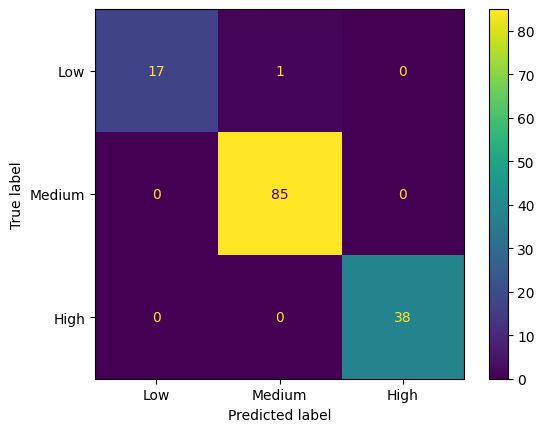

In [ ]:
# Random Forest: Testset
rf_class_test_pred = rf_class.predict(X_test_rf)

# Utvärdera
acc_rf = accuracy_score(y_test_rf, rf_class_test_pred)
print(f"Random Forest Test Accuracy: {acc_rf:.2f}")
print("\nClassification Report (Test set):\n", classification_report(
  y_test_rf, 
  rf_class_test_pred, 
  labels=labels,
  target_names=targets
))

# Confusuion Matrix
cm = ConfusionMatrixDisplay.from_predictions(
  y_test_rf, 
  rf_class_test_pred, 
  labels=labels,
  display_labels=targets)

print(f'Confusion Matrix (Testset):{cm}')

---

### Träna båda modellerna på hela datasetet

In [ ]:
# Linear Regression träning på hela datasetet
lr_model = LinearRegression()
lr_model.fit(X_reg, y_reg)

lr_full_pred = lr_model.predict(X_reg)

# Utvärdera med RMSE på hela datasetet
lr_full_rmse = root_mean_squared_error(y_reg, lr_full_pred)
print(f"Linear Regression Full Data RMSE: {lr_full_rmse:.2f}")

# Jämför medelvärdet på y_reg med RMSE (Hur stor andel av medelvärdet utgör RMSE)
print(f"Mean of y_reg: {y_reg.mean():.2f}")
print(f"RMSE / y_reg mean: {lr_full_rmse / y_reg.mean():.2f}")

Linear Regression Full Data RMSE: 0.34
Mean of y_reg: 6.44
RMSE / y_reg mean: 0.05


Random Forest Full Data Accuracy: 1.00

Classification Report (Full dataset):
               precision    recall  f1-score   support

         Low       1.00      1.00      1.00       100
      Medium       1.00      1.00      1.00       406
        High       1.00      1.00      1.00       199

    accuracy                           1.00       705
   macro avg       1.00      1.00      1.00       705
weighted avg       1.00      1.00      1.00       705



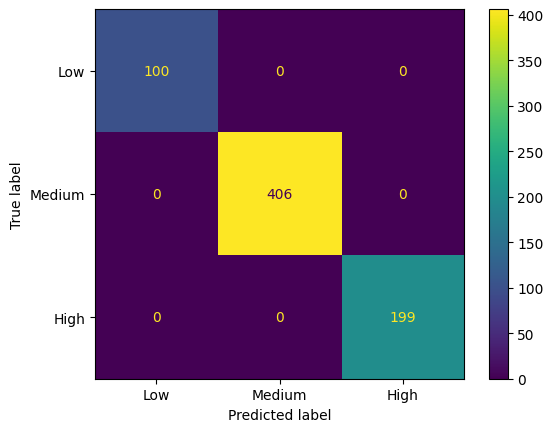

In [ ]:
# Random Forest Classifier träning på hela datasetet
rf_class = RandomForestClassifier(random_state=42)
rf_class.fit(X_rf, y_rf)

# Prediktioner på hela datasetet
rf_full_pred = rf_class.predict(X_rf)

# Utvärdera
acc_rf_full = accuracy_score(y_rf, rf_full_pred)
print(f"Random Forest Full Data Accuracy: {acc_rf_full:.2f}")
print("\nClassification Report (Full dataset):\n", classification_report(
  y_rf,
  rf_full_pred,
  labels=labels,
  target_names=targets
))

# Confusion Matrix
cm = ConfusionMatrixDisplay.from_predictions(
  y_rf,
  rf_full_pred,
  labels=labels,
  display_labels=targets
)
plt.show()